In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
times = np.load("times_outlier.npy")
data = np.load("data_outlier.npy")
nyq = 2.46 # from the NyquistFreq.
N = len(times)

def get_df(nyq, N):
    # this work only for N even
    return 2 * nyq / N
    
def get_all_k(nyq, N):
    # here nu_k = k * df 
    return np.fft.fftfreq(N) * N

def atom(time, k, df):
    return np.exp(-2j * np.pi * time * k * df)

def fourier_dictionary(nyq, N, time):
    all_k = get_all_k(nyq, N)
    df = get_df(nyq, N)
    return atom(time, all_k[:, np.newaxis], df)


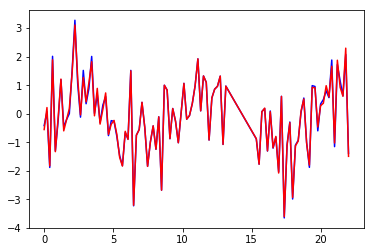

In [45]:
F = fourier_dictionary(nyq, N, times)
Finv = np.linalg.pinv(F)
f_data = Finv.dot(data)
data_back = F.dot(f_data)
plt.plot(times, data, 'b')
plt.plot(times, data_back.real, 'r')

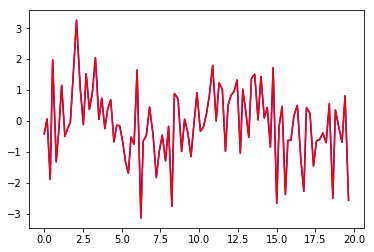

In [46]:
times = np.load("times_slight.npy")
data = np.load("data_slight.npy")
F = fourier_dictionary(nyq, N, times)
Finv = np.linalg.pinv(F)
f_data = Finv.dot(data)
data_back = F.dot(f_data)
plt.plot(times, data, 'b')
plt.plot(times, data_back.real, 'r')

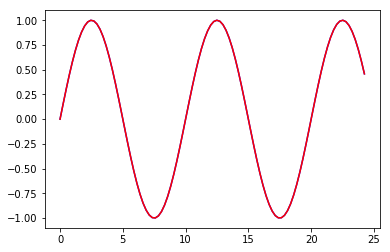

In [52]:
times_t = np.load("times_template.npy")
data_t = np.load("data_template.npy")
F_t = fourier_dictionary(nyq, N, times_t)
Finv_t = np.linalg.pinv(F_t)
f_data_t = Finv.dot(data_t)
data_back_t = F.dot(f_data_t)
plt.plot(times_t, data_t, 'b')
plt.plot(times_t, data_back_t.real, 'r')

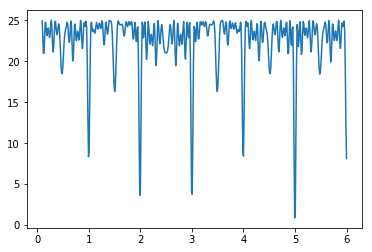

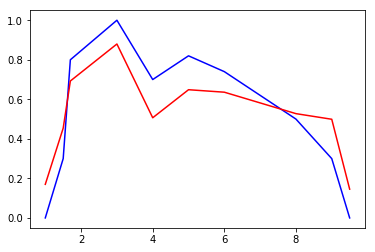

In [55]:
times = np.array([1, 1.5, 1.7, 3, 4, 5, 6, 8, 9, 9.5])
values = [0, 0.3, 0.8, 1, 0.7, 0.82, 0.74, 0.5, 0.3, 0]
# SS function
class Ss:
    def __init__(self, nu_range=[0.1, 6], N_nu=500):
        self.N_nu = N_nu
        self.nu_range = nu_range
    
    def SS_sum(self, nu, N, time):
        sum_value = 0
        for l in range(N-1):
            for k in range(l+1, N):
                sum_value += (np.sin(2 * np.pi * nu * (time[k] - time[l]))) ** 2
        return sum_value

    def SS_function(self, time):
        SS_values = []
        nu_values = np.linspace(self.nu_range[0], self.nu_range[1], self.N_nu)
        N = len(time)
        for nu in nu_values:
            SS_values.append(self.SS_sum(nu, N, time))
        idx_min = np.argmin(SS_values)
        return nu_values, SS_values

def get_nyquist(SS_values, nu_values):
    idx_min = np.argmin(SS_values)
    return nu_values[idx_min]

ss_class = Ss()
nu, ss = ss_class.SS_function(times)
plt.plot(nu, ss)
nyq = get_nyquist(ss, nu)
N = len(times)
# nyq = 1
F = fourier_dictionary(nyq, N, times)
Finv = np.linalg.pinv(F)
f_data = Finv.dot(values)
data_back = F.dot(f_data)
plt.figure()
plt.plot(times, values, 'b')
plt.plot(times, data_back.real, 'r')

array([0.1       , 0.11182365, 0.12364729, 0.13547094, 0.14729459,
       0.15911824, 0.17094188, 0.18276553, 0.19458918, 0.20641283,
       0.21823647, 0.23006012, 0.24188377, 0.25370741, 0.26553106,
       0.27735471, 0.28917836, 0.301002  , 0.31282565, 0.3246493 ,
       0.33647295, 0.34829659, 0.36012024, 0.37194389, 0.38376754,
       0.39559118, 0.40741483, 0.41923848, 0.43106212, 0.44288577,
       0.45470942, 0.46653307, 0.47835671, 0.49018036, 0.50200401,
       0.51382766, 0.5256513 , 0.53747495, 0.5492986 , 0.56112224,
       0.57294589, 0.58476954, 0.59659319, 0.60841683, 0.62024048,
       0.63206413, 0.64388778, 0.65571142, 0.66753507, 0.67935872,
       0.69118236, 0.70300601, 0.71482966, 0.72665331, 0.73847695,
       0.7503006 , 0.76212425, 0.7739479 , 0.78577154, 0.79759519,
       0.80941884, 0.82124248, 0.83306613, 0.84488978, 0.85671343,
       0.86853707, 0.88036072, 0.89218437, 0.90400802, 0.91583166,
       0.92765531, 0.93947896, 0.95130261, 0.96312625, 0.97494